## Customer Segmentation - KMeans Clustering VS Logistic Regression

Objective: Compare and contrast K-Means clustering and logistic regression for customer segementation tasks.
Requirements:
1. Obtain a customer dataset with attributes like demographics, puchase history, etc.
2. Apply K-Means clustering to identify distinct customer segments based on their chracteristics.
3. Train a logistic regression model to predict customer segment membership based on their features.
4. Evaluate and compare the performance of both approaches(eg. silhoutte score for clustering, classification accuracy for logistic regression)

## Loading Dataset

In [ ]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Shape of Dataset (Rows and Cols)

In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Drop Unnecessary Column 'Customer ID'

In [ ]:
data = data.drop(['CustomerID'], axis=1)

In [ ]:
data.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Gender'] = LE.fit_transform(data['Gender'])

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
data['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

## Visualizations

<ipython-input-31-73d760bc4e5e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


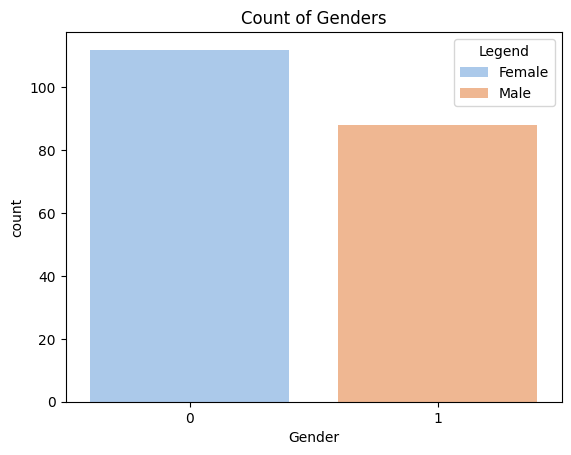

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Gender', data=data, palette='pastel')
plt.title("Count of Genders")
legends = {'Female': 'Female', 'Male': 'Male'}
plt.legend(title='Legend', labels=legends, loc='upper right')
plt.show()

There are more Females than males in the dataset

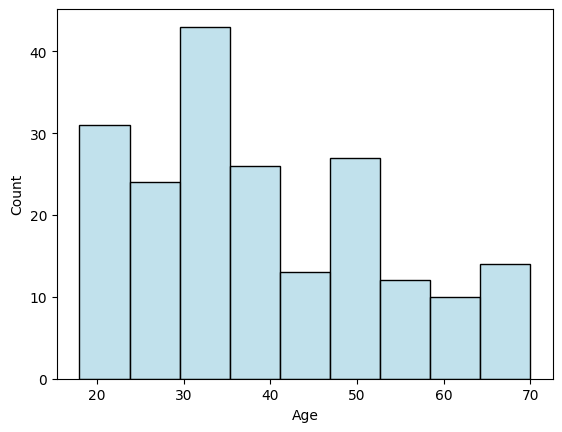

In [ ]:
sns.histplot(data['Age'], color='lightblue')
plt.show()

Most customers have the age range between 30 to 40

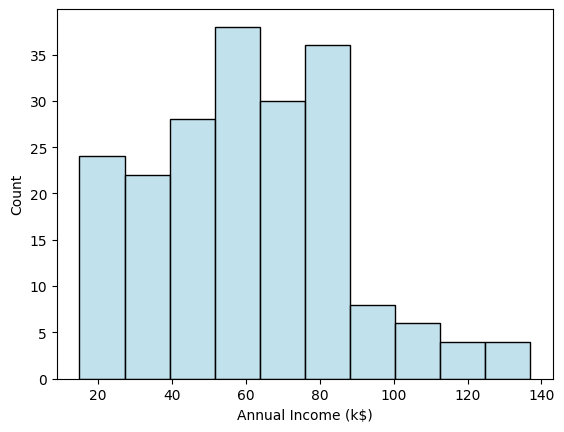

In [ ]:
sns.histplot(data['Annual Income (k$)'], color='lightblue')
plt.show()

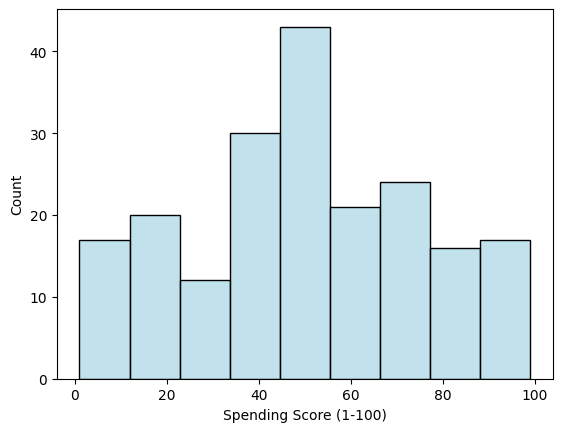

In [ ]:
sns.histplot(data['Spending Score (1-100)'], color='lightblue')
plt.show()

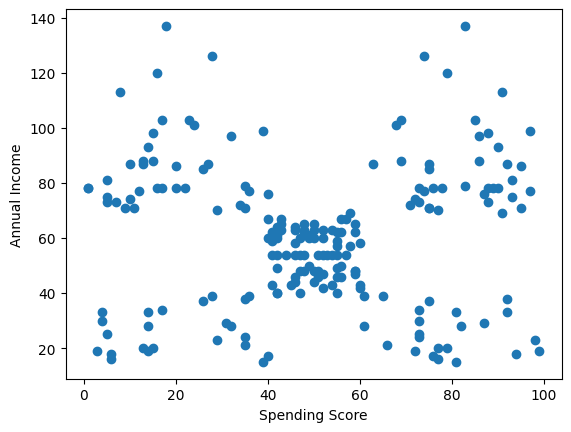

In [ ]:
plt.scatter(x=data['Spending Score (1-100)'], y=data['Annual Income (k$)'])
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

In [ ]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


## Model Building

# K-Means Clustering

#### 1. Taking 2 variables

In [ ]:
X2 = data.loc[:, ['Annual Income (k$)','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

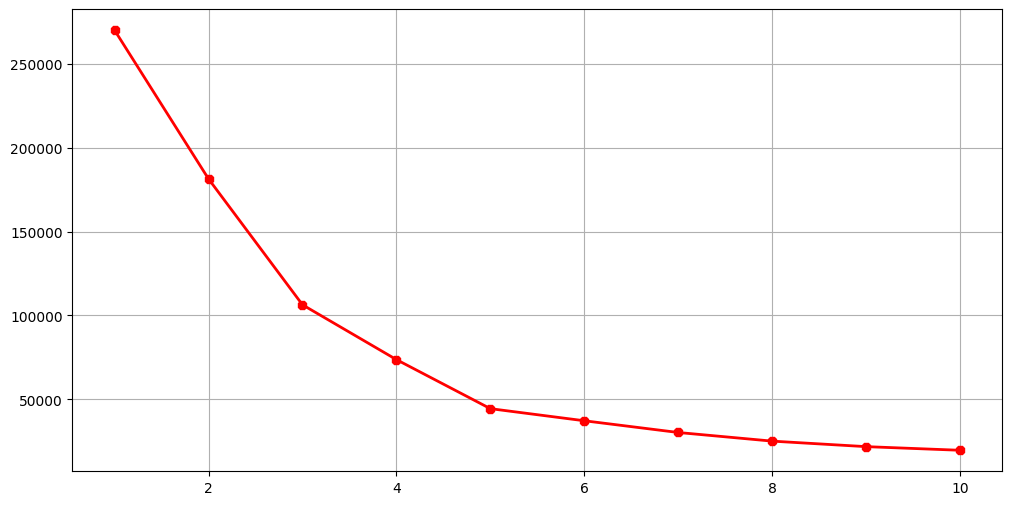

In [ ]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.show()

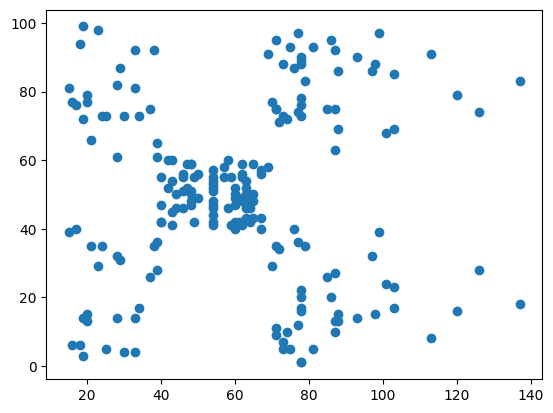

In [ ]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5)

label = kmeans.fit_predict(X2)
print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#kmeans.cluster_centroids_

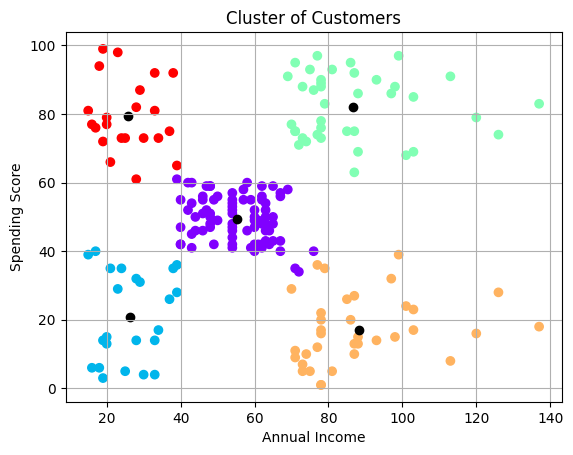

In [ ]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

## Silhouette Score (-1, 0, 1)

In [ ]:
from sklearn.metrics import silhouette_score
print("silhouette_score is :",silhouette_score(X2, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.553931997444648


#### 2. Taking All 3 variables

In [ ]:
from sklearn.preprocessing import StandardScaler
X3 = data.loc[:, ['Annual Income (k$)','Spending Score (1-100)', 'Age']].values

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data (computes mean and standard deviation)
scaler.fit(X3)

# Transform the data using the scaler (standardize the data)
X1 = scaler.fit_transform(X3)

In [ ]:
#X3 = data.loc[:, ['Annual Income (k$)','Spending Score (1-100)', 'Age']].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

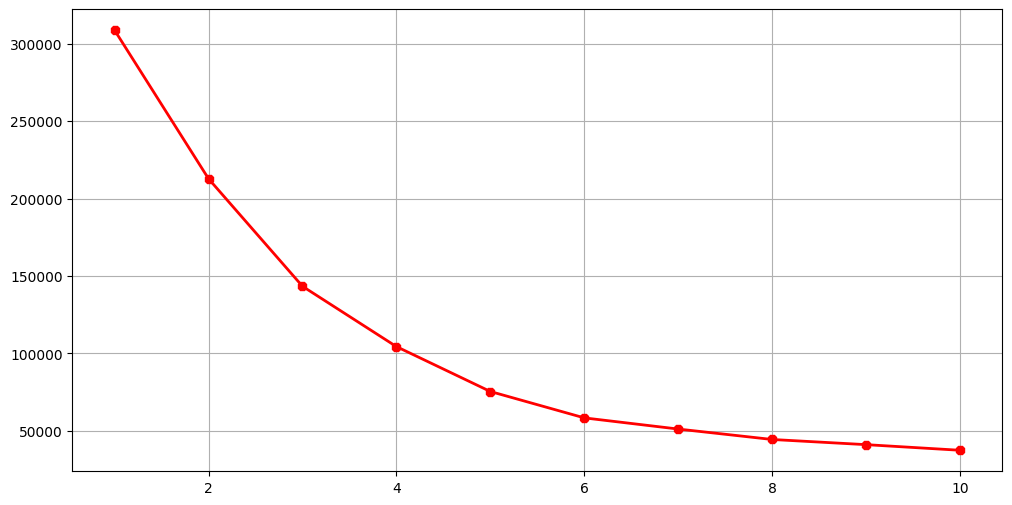

In [ ]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5)

label = kmeans.fit_predict(X3)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


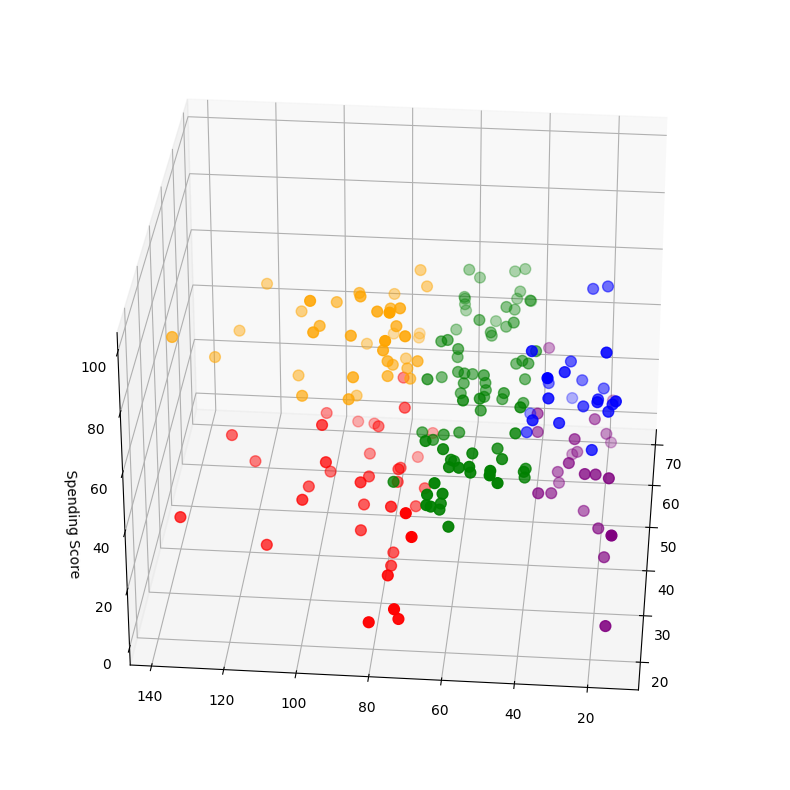

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

data['label'] = label

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data['Annual Income (k$)'][data.label == 0], data['Spending Score (1-100)'][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data['Annual Income (k$)'][data.label == 1], data['Spending Score (1-100)'][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data['Annual Income (k$)'][data.label == 2], data['Spending Score (1-100)'][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data['Annual Income (k$)'][data.label == 3], data['Spending Score (1-100)'][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data['Annual Income (k$)'][data.label == 4], data['Spending Score (1-100)'][data.label == 4], c='purple', s=60)

ax.view_init(30, 185)
ax.set_zlabel('Spending Score')
plt.show()

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
print("silhouette_score is :",silhouette_score(X3, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.44428597560893024


## Adding Customer Segment as new column

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,4
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,4


In [ ]:
data['label'].value_counts()

label
2    79
3    39
1    36
4    23
0    23
Name: count, dtype: int64

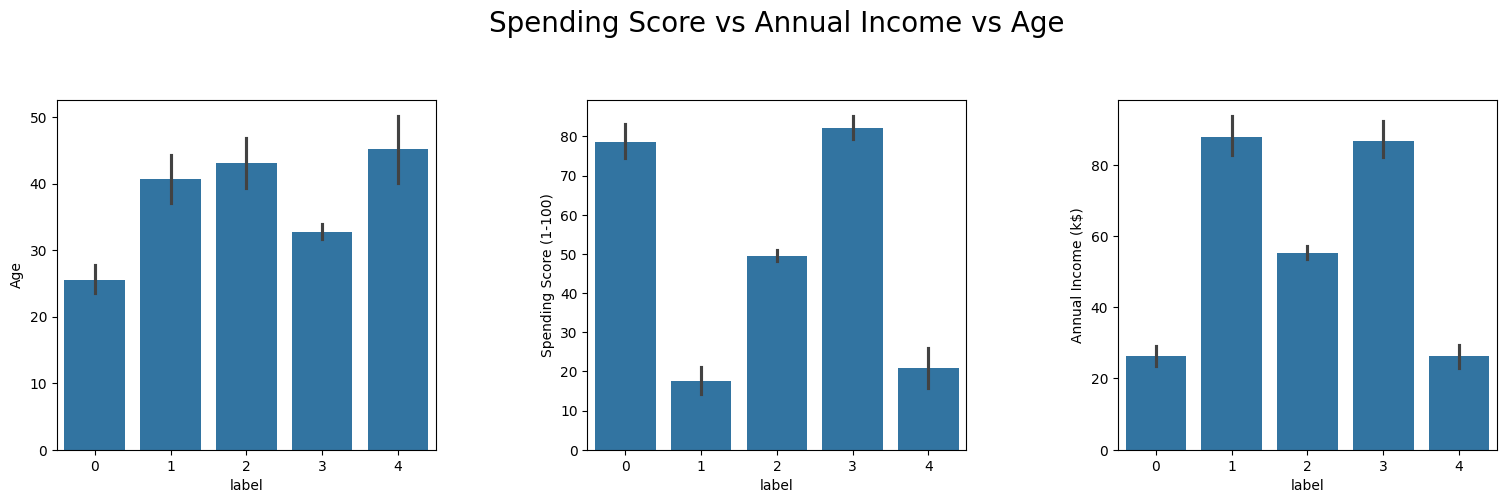

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.barplot(x='label',y='Age',data=data ,ax=ax[0])
sns.barplot(x='label',y='Spending Score (1-100)',data=data, ax=ax[1])
sns.barplot(x='label',y='Annual Income (k$)',data=data, ax=ax[2])
plt.suptitle('Spending Score vs Annual Income vs Age',fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.8,
                    wspace=0.4,
                    hspace=0.4)

fig.tight_layout()
plt.show()

## Logistic Regression

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,4
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,4


In [ ]:
data.shape

(200, 5)

In [ ]:
data['label'].value_counts()

label
2    79
3    39
1    36
4    23
0    23
Name: count, dtype: int64

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## X & Y (Independent & Dependent Variables)

In [ ]:
x = data.drop('label', axis=1)
y = data['label']

In [ ]:
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
y

0      4
1      0
2      4
3      0
4      4
      ..
195    3
196    1
197    3
198    1
199    3
Name: label, Length: 200, dtype: int32

## Standardization

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data (computes mean and standard deviation)
scaler.fit(x)

# Transform the data using the scaler (standardize the data)
x = scaler.fit_transform(x)

In [ ]:
x

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## Train - Test Split

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

NameError: name 'train_test_split' is not defined

In [ ]:
print(x.shape, x_train.shape, y_train.shape)

(200, 4) (140, 4) (140,)


In [ ]:
print(y.shape, x_test.shape, y_test.shape)

(200,) (60, 4) (60,)


## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

## Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9166666666666666


In [ ]:
from sklearn.metrics import classification_report
CR = classification_report(y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      0.91      0.95        11
           2       0.81      1.00      0.89        21
           3       1.00      1.00      1.00        11
           4       1.00      0.67      0.80         9

    accuracy                           0.92        60
   macro avg       0.96      0.89      0.92        60
weighted avg       0.93      0.92      0.92        60

